## THIS IS A COPY OF EXPLORATORY.IPYNB, DUE TO NEW STRATEGY TO COMPUTE JOINT ANGLES STARTED ON 19TH JULY

In [2]:
import pandas as pd
from utils import *
from joint_angles.calculate_joint_angles import *
# Import everything needed to edit video clips 
from moviepy.editor import *

%load_ext autoreload
%autoreload 2

In [3]:
data_path = "../data/small_data/pose_saved.csv"
data = pd.read_csv(data_path)
print(data.dtypes)
data.head()

rgb_frameid     int64
kp3ds          object
kp2ds          object
bboxes         object
dtype: object


,rgb_frameid,kp3ds,kp2ds,bboxes
0,5000,"[[2433.527603034382, -1938.5729978558697, 65.7...","[[[1008.9975321765137, 101.44294880551615, 0.7...","[[743.9833984375, 0.0, 1234.8826904296875, 622..."
1,5001,"[[2446.607236443355, -1934.9092386957425, 67.5...","[[[999.6039120528574, 99.06533975351539, 0.758...","[[740.1781616210938, 0.0, 1231.525390625, 622...."
2,5002,"[[2460.826163175043, -1930.3790846162383, 69.3...","[[[992.6256386363831, 97.69814209614634, 0.727...","[[736.6728515625, 0.089996337890625, 1228.7199..."
3,5003,"[[2473.6984260388895, -1926.4497944254015, 73....","[[[985.1741546289431, 95.75803250340277, 0.752...","[[734.6681518554688, 0.10302734375, 1223.74499..."
4,5004,"[[2489.1893336653734, -1925.6113847420506, 73....","[[[978.2528523690814, 95.23409782663788, 0.765...","[[733.6686401367188, 0.173248291015625, 1216.8..."


### Let's only take the first two columns


In [4]:
df = data[['rgb_frameid', 'kp3ds']]
print(type(df.kp3ds[0]))
df.kp3ds[0]

<class 'str'>


'[[2433.527603034382, -1938.5729978558697, 65.77853319876616, 0.715919840335846], [2455.1936794872177, -1931.8907779942238, 97.20523561103043, 0.6419889330863953], [2413.1285141606477, -1915.3594788777505, 100.405452670196, 0.6129101574420929], [2553.3050698424627, -1851.7950717623419, 114.90635783137866, 0.7434812635183334], [2406.47320246087, -1791.7937153377102, 130.30197906455479, 0.58548554033041], [2645.352619537392, -1677.0320842443841, -34.92217267652428, 0.721489417552948], [2305.953153691892, -1832.9165705828136, -22.7491032373318, 0.675788402557373], [2713.5425084514063, -1596.1945567660148, -283.31397363860276, 0.6877377976973852], [2205.742184616739, -2043.9587716844408, -78.7145570247363, 0.6339661717414856], [2746.769581107897, -1777.5664535076626, -405.71990057299956, 0.6417463049292564], [2196.6960493973734, -2288.6940364719085, -26.30439482351236, 0.7618403911590577], [2601.681535535075, -1730.8660615202673, -554.1895844242209, 0.642460686819894], [2415.360061812779, 

### Let's convert the string into vector

In [5]:
df['kp3ds'] = df['kp3ds'].apply(str2float)
df['kp3ds']

0       [[2433.527603034382, -1938.5729978558697, 65.7...
1       [[2446.607236443355, -1934.9092386957425, 67.5...
2       [[2460.826163175043, -1930.3790846162383, 69.3...
3       [[2473.6984260388895, -1926.4497944254015, 73....
4       [[2489.1893336653734, -1925.6113847420506, 73....
                              ...                        
4995    [[2783.777098030839, -480.39212498854664, -45....
4996    [[2786.0874771535578, -479.94158441571295, -46...
4997    [[2791.0247204375196, -479.5124704274368, -46....
4998    [[2793.123929938673, -480.28451711442835, -46....
4999    [[2799.4689841766367, -479.83214699544794, -46...
Name: kp3ds, Length: 5000, dtype: object

### Let's separate each kp3ds line into columns for each body points, and remove kp3ds column

In [6]:
df_points = get_df_points(df)
df = pd.concat([df, df_points], axis=1)
df.drop(columns=['kp3ds'], inplace=True)
df.head(3)

,rgb_frameid,point_0,point_1,point_2,point_3,point_4,point_5,point_6,point_7,point_8,point_9,point_10,point_11,point_12,point_13,point_14,point_15,point_16
0,5000,"[2433.527603034382, -1938.5729978558697, 65.77...","[2455.1936794872177, -1931.8907779942238, 97.2...","[2413.1285141606477, -1915.3594788777505, 100....","[2553.3050698424627, -1851.7950717623419, 114....","[2406.47320246087, -1791.7937153377102, 130.30...","[2645.352619537392, -1677.0320842443841, -34.9...","[2305.953153691892, -1832.9165705828136, -22.7...","[2713.5425084514063, -1596.1945567660148, -283...","[2205.742184616739, -2043.9587716844408, -78.7...","[2746.769581107897, -1777.5664535076626, -405....","[2196.6960493973734, -2288.6940364719085, -26....","[2601.681535535075, -1730.8660615202673, -554....","[2415.360061812779, -1740.6648141592275, -579....","[2679.9952724415434, -1787.690377703567, -936....","[2400.8627281541926, -1778.5203763504858, -100...","[2756.2899011781155, -1799.6261441022816, -135...","[2414.4655146949895, -1684.1135292174695, -136..."
1,5001,"[2446.607236443355, -1934.9092386957425, 67.53...","[2467.2217900211476, -1930.3347251724365, 97.9...","[2428.116065842915, -1907.5241451478714, 101.8...","[2569.8145999447324, -1852.6092353611177, 115....","[2422.253575661983, -1782.1572547434125, 129.7...","[2665.6696670464685, -1679.922232055294, -38.2...","[2318.2960842243237, -1820.4548819188512, -18....","[2725.426330672456, -1602.0102743236503, -296....","[2208.9420826541023, -2023.5744809148555, -71....","[2750.7631518119424, -1794.6567370184462, -407...","[2201.630793546887, -2268.631210247707, -14.05...","[2610.394828575268, -1748.6124215080272, -551....","[2419.367793916796, -1747.9863605084934, -570....","[2687.5016372386776, -1798.4410208952943, -933...","[2400.7339061752123, -1788.0900152347378, -100...","[2760.4205598737426, -1799.6442142374067, -135...","[2415.447631110754, -1698.3153128577876, -1366..."
2,5002,"[2460.826163175043, -1930.3790846162383, 69.34...","[2484.918090524629, -1924.8040044837676, 99.79...","[2440.8411861266345, -1900.254950299179, 104.3...","[2584.0739331874606, -1851.960169894501, 113.9...","[2435.4652524619855, -1776.6510228370694, 132....","[2684.776549436161, -1687.3026095059545, -43.6...","[2329.3454519494003, -1808.3264969982044, -19....","[2743.056079751839, -1614.688905862936, -304.6...","[2195.1750290174386, -2006.137971398989, -65.8...","[2755.032244545425, -1812.6779647475068, -409....","[2206.279819898573, -2244.3941945026313, -3.28...","[2619.789612932464, -1751.2821608695785, -572....","[2427.258121931534, -1746.360628016013, -587.8...","[2695.004890749521, -1794.4201805342605, -942....","[2404.6687226515774, -1789.2744484614768, -100...","[2769.543079408299, -1809.2850525834021, -1367...","[2415.272491615325, -1700.7187023871097, -1364..."


#### The framerate is 30 FPS, let's convert the frameid column into time

In [7]:
df['rgb_frameid'] = (df['rgb_frameid'] - 5000)/30
df.rename(columns={'rgb_frameid': 'time'}, inplace=True)
df.head(2)

,time,point_0,point_1,point_2,point_3,point_4,point_5,point_6,point_7,point_8,point_9,point_10,point_11,point_12,point_13,point_14,point_15,point_16
0,0.000000,"[2433.527603034382, -1938.5729978558697, 65.77...","[2455.1936794872177, -1931.8907779942238, 97.2...","[2413.1285141606477, -1915.3594788777505, 100....","[2553.3050698424627, -1851.7950717623419, 114....","[2406.47320246087, -1791.7937153377102, 130.30...","[2645.352619537392, -1677.0320842443841, -34.9...","[2305.953153691892, -1832.9165705828136, -22.7...","[2713.5425084514063, -1596.1945567660148, -283...","[2205.742184616739, -2043.9587716844408, -78.7...","[2746.769581107897, -1777.5664535076626, -405....","[2196.6960493973734, -2288.6940364719085, -26....","[2601.681535535075, -1730.8660615202673, -554....","[2415.360061812779, -1740.6648141592275, -579....","[2679.9952724415434, -1787.690377703567, -936....","[2400.8627281541926, -1778.5203763504858, -100...","[2756.2899011781155, -1799.6261441022816, -135...","[2414.4655146949895, -1684.1135292174695, -136..."
1,0.033333,"[2446.607236443355, -1934.9092386957425, 67.53...","[2467.2217900211476, -1930.3347251724365, 97.9...","[2428.116065842915, -1907.5241451478714, 101.8...","[2569.8145999447324, -1852.6092353611177, 115....","[2422.253575661983, -1782.1572547434125, 129.7...","[2665.6696670464685, -1679.922232055294, -38.2...","[2318.2960842243237, -1820.4548819188512, -18....","[2725.426330672456, -1602.0102743236503, -296....","[2208.9420826541023, -2023.5744809148555, -71....","[2750.7631518119424, -1794.6567370184462, -407...","[2201.630793546887, -2268.631210247707, -14.05...","[2610.394828575268, -1748.6124215080272, -551....","[2419.367793916796, -1747.9863605084934, -570....","[2687.5016372386776, -1798.4410208952943, -933...","[2400.7339061752123, -1788.0900152347378, -100...","[2760.4205598737426, -1799.6442142374067, -135...","[2415.447631110754, -1698.3153128577876, -1366..."


### Placement of 3D body points
<a href=https://github.com/open-mmlab/mmpose/tree/main/projects/rtmpose><img src="https://user-images.githubusercontent.com/13503330/245036409-2417e4f7-2203-468f-bad0-e7a6a6bf8251.jpg"  width="150" height="300">

![alt text](img/3d_body_points_axes.jpeg "Title")

#### Which one is left/right ?
At the beginning of the video, the participants right foot has the lowest x value. By taking a look at points 15 and 16 x values, the **point 16** corresponds to the **right** foot.

From this information, we can better precise the column names in our dataset.

In [8]:
df.rename(columns = {'point_5':'leftshoulder', 'point_6':'rightshoulder', 
                     'point_8':'rightelbow', 'point_7':'leftelbow', 
                     'point_10':'rightwrist', 'point_9':'leftwrist',
                     'point_12':'righthip', 'point_11':'lefthip'}, inplace = True)
df.head(2)

,time,point_0,point_1,point_2,point_3,point_4,leftshoulder,rightshoulder,leftelbow,rightelbow,leftwrist,rightwrist,lefthip,righthip,point_13,point_14,point_15,point_16
0,0.000000,"[2433.527603034382, -1938.5729978558697, 65.77...","[2455.1936794872177, -1931.8907779942238, 97.2...","[2413.1285141606477, -1915.3594788777505, 100....","[2553.3050698424627, -1851.7950717623419, 114....","[2406.47320246087, -1791.7937153377102, 130.30...","[2645.352619537392, -1677.0320842443841, -34.9...","[2305.953153691892, -1832.9165705828136, -22.7...","[2713.5425084514063, -1596.1945567660148, -283...","[2205.742184616739, -2043.9587716844408, -78.7...","[2746.769581107897, -1777.5664535076626, -405....","[2196.6960493973734, -2288.6940364719085, -26....","[2601.681535535075, -1730.8660615202673, -554....","[2415.360061812779, -1740.6648141592275, -579....","[2679.9952724415434, -1787.690377703567, -936....","[2400.8627281541926, -1778.5203763504858, -100...","[2756.2899011781155, -1799.6261441022816, -135...","[2414.4655146949895, -1684.1135292174695, -136..."
1,0.033333,"[2446.607236443355, -1934.9092386957425, 67.53...","[2467.2217900211476, -1930.3347251724365, 97.9...","[2428.116065842915, -1907.5241451478714, 101.8...","[2569.8145999447324, -1852.6092353611177, 115....","[2422.253575661983, -1782.1572547434125, 129.7...","[2665.6696670464685, -1679.922232055294, -38.2...","[2318.2960842243237, -1820.4548819188512, -18....","[2725.426330672456, -1602.0102743236503, -296....","[2208.9420826541023, -2023.5744809148555, -71....","[2750.7631518119424, -1794.6567370184462, -407...","[2201.630793546887, -2268.631210247707, -14.05...","[2610.394828575268, -1748.6124215080272, -551....","[2419.367793916796, -1747.9863605084934, -570....","[2687.5016372386776, -1798.4410208952943, -933...","[2400.7339061752123, -1788.0900152347378, -100...","[2760.4205598737426, -1799.6442142374067, -135...","[2415.447631110754, -1698.3153128577876, -1366..."


In [9]:
# Add middle of the hip as another "joint position"
difference = df['lefthip'] - df['righthip']
difference = difference/2
hips = df['righthip'] + difference
df['hips'] = hips

In [10]:
# Add middle of the shoulders as another "joint position"
difference = df['leftshoulder'] - df['rightshoulder']
difference = difference/2
neck = df['rightshoulder'] + difference
df['neck'] = neck

In [11]:
df.head(2)

,time,point_0,point_1,point_2,point_3,point_4,leftshoulder,rightshoulder,leftelbow,rightelbow,leftwrist,rightwrist,lefthip,righthip,point_13,point_14,point_15,point_16,hips,neck
0,0.000000,"[2433.527603034382, -1938.5729978558697, 65.77...","[2455.1936794872177, -1931.8907779942238, 97.2...","[2413.1285141606477, -1915.3594788777505, 100....","[2553.3050698424627, -1851.7950717623419, 114....","[2406.47320246087, -1791.7937153377102, 130.30...","[2645.352619537392, -1677.0320842443841, -34.9...","[2305.953153691892, -1832.9165705828136, -22.7...","[2713.5425084514063, -1596.1945567660148, -283...","[2205.742184616739, -2043.9587716844408, -78.7...","[2746.769581107897, -1777.5664535076626, -405....","[2196.6960493973734, -2288.6940364719085, -26....","[2601.681535535075, -1730.8660615202673, -554....","[2415.360061812779, -1740.6648141592275, -579....","[2679.9952724415434, -1787.690377703567, -936....","[2400.8627281541926, -1778.5203763504858, -100...","[2756.2899011781155, -1799.6261441022816, -135...","[2414.4655146949895, -1684.1135292174695, -136...","[2508.520798673927, -1735.7654378397474, -566....","[2475.652886614642, -1754.974327413599, -28.83..."
1,0.033333,"[2446.607236443355, -1934.9092386957425, 67.53...","[2467.2217900211476, -1930.3347251724365, 97.9...","[2428.116065842915, -1907.5241451478714, 101.8...","[2569.8145999447324, -1852.6092353611177, 115....","[2422.253575661983, -1782.1572547434125, 129.7...","[2665.6696670464685, -1679.922232055294, -38.2...","[2318.2960842243237, -1820.4548819188512, -18....","[2725.426330672456, -1602.0102743236503, -296....","[2208.9420826541023, -2023.5744809148555, -71....","[2750.7631518119424, -1794.6567370184462, -407...","[2201.630793546887, -2268.631210247707, -14.05...","[2610.394828575268, -1748.6124215080272, -551....","[2419.367793916796, -1747.9863605084934, -570....","[2687.5016372386776, -1798.4410208952943, -933...","[2400.7339061752123, -1788.0900152347378, -100...","[2760.4205598737426, -1799.6442142374067, -135...","[2415.447631110754, -1698.3153128577876, -1366...","[2514.881311246032, -1748.2993910082603, -560....","[2491.9828756353963, -1750.1885569870726, -28...."


## Events selection in video

Let's assume that the picking event begins when subject looks at the object of interest

In [12]:
events = {'picking_r' : [[6, 7], [132.5, 134.5]],
          'cutting' : [[149, 169]],
          'stirring' : [[]]}

It seems like that our participant is right-handed.

## Features

### 1. Get angles 

At first, I just tried to get the angles between 2 vectors (for example shoulder-elbow and wrist-elbow) to define it as the "angle joint". But then I realized that one can not just do that, since it will be then not sufficient to define the flexion, ab/adduction etc. 

I went back to read some literature on how to define joint angles based on 3D body points, and found some interesting references :
- [Method to estimate joint angles + code](https://temugeb.github.io/python/motion_capture/2021/09/16/joint_rotations.html)
It explains how to find joint angles based on basic body pose (T-pose)
- [This paper](https://www.nature.com/articles/s41591-022-02045-1#Sec9) explains that joint angles can be extracted in 3 d.o.f for each joint, by following the International Society of Biomechanics recommendations for Euler angle extractions of X (abduction/adduction), Y (internal/external rotation) and Z (flexion/extension).
- [This paper](https://www.rachelvitali.com/docs/Determining%20anatomical%20frames%20via%20inertial%20motion%20capture%20-%20a%20survey%20of%20methods.pdf) says that there are different methods used to define anatomical frames of reference for inertial motion capture.

--> So I should come up myself with a method to define the anatomical frame of reference.

**Here is my method to try to express the joint angles in every anatomical plane :**

1. Define the anatomical plan of the movement with the help of the existing body points
2. Project the moving segment onto that plan
3. Compute the angle between a segment of that plane and the moving segment
4. Readjust the angle according to litterature to distinguis antagonists movement (flexion/extension)

<a href = "https://en.wikipedia.org/wiki/Anatomical_plane"><img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/Human_anatomy_planes%2C_labeled.svg/1200px-Human_anatomy_planes%2C_labeled.svg.png" width = 200/></a>

#### 1.1 Shoulder forward flexion/extension

<a href="https://physicaltherapyweb.com/hyper-extension-internal-rotation-heri-test/"><img src ="https://i0.wp.com/physicaltherapyweb.com/wp-content/uploads/2016/08/shoulder-flexion-and-extension.png?fit=329%2C410&ssl=1" width = 200/></a>


The movement is on the sagittal plane. RoM is around 180 degrees of flexion from this [paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7549223/#CR6).

<img src = "img/shoulder_flex.jpg" width = 150>

The sagittal plane for the shoulder is defined by the plane spanned by the vector <span style="color:red">b</span> and the <span style="color:green">normal vector</span> (= <span style="color:red">a x b</span>.)

Then, <span style="color:red">d</span> is projected onto that plane.

Finally, the shoulder forward flexion is the angle betwen the projected <span style="color:red">d</span> and <span style="color:red">b</span>.

To differentiate between flexion and extension, one can see if projected <span style="color:red">d</span> is closest to the <span style="color:green">normal vector</span> <span style="color:red">a x b</span> (flexion) or <span style="color:red">b x a</span> (extension)




In [27]:
A = df['rightshoulder'] - df['leftshoulder']
B = df['lefthip'] - df['leftshoulder']
D = df['leftelbow'] - df['leftshoulder']

B_u = [unit_vector(b) for b in B]
D_u = [unit_vector(d) for d in D]
N = [np.cross(a, b) for a, b in zip(A, B)]

# d projection
N2 = [np.cross(n, b) for n, b in zip(N, B)]
# finding norm of the vector N2 
N2_norm = [np.linalg.norm(n) for n in N2]
D_proj = [d - unit_vector((np.dot(d, n)/norm**2)*n) for d, n, norm in zip(D_u, N2, N2_norm)]

angle = [np.dot(d, b) for d, b in zip(D_proj, B_u)]
angle = np.arccos(angle)*180/np.pi

# To define if it is flexion or extension
N_behind = [np.cross(b, a) for a, b in zip(A, B)]
for i in range(len(N)):
    norm_front = np.linalg.norm(D_proj[i] - N[i])
    norm_behind = np.linalg.norm(D_proj[i] - (N_behind[i]))

    if norm_behind < norm_front:
        angle[i] = -angle[i]

df['leftshoulder_flex'] = angle

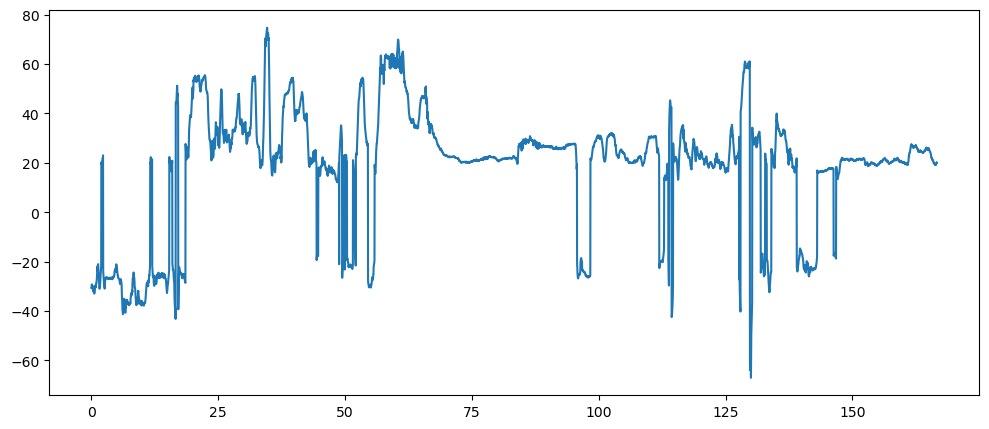

In [28]:
plt.figure( figsize = (12,5))
plt.plot(df['time'], df['leftshoulder_flex'])

In [31]:
df['time'][3900]

130.0

In [ ]:
plt.figure( figsize = (12,5))
plt.plot(df['time'], df['leftshoulder_flex'])

Let's choose a moment where the participant washes their hands, to target a moment where the shoulders only do flexion, with no abduction.

### Get "naive" joint angles, without separation to 3 planes

In [ ]:
add_naive_joint_angles(df, 'leftshoulder', 'leftelbow', 'leftwrist')
add_naive_joint_angles(df, 'lefthip', 'leftshoulder', 'leftelbow')
add_naive_joint_angles(df, 'rightshoulder', 'rightelbow', 'rightwrist')
add_naive_joint_angles(df, 'righthip', 'rightshoulder', 'rightelbow')
df.head(2)

,time,point_0,point_1,point_2,point_3,point_4,leftshoulder,rightshoulder,leftelbow,rightelbow,...,neck,hips_angles,leftshoulder_angles,rightshoulder_angles,leftelbow_angles,rightelbow_angles,leftelbow_angle,leftshoulder_angle,rightelbow_angle,rightshoulder_angle
0,0.000000,"[2433.527603034382, -1938.5729978558697, 65.77...","[2455.1936794872177, -1931.8907779942238, 97.2...","[2413.1285141606477, -1915.3594788777505, 100....","[2553.3050698424627, -1851.7950717623419, 114....","[2406.47320246087, -1791.7937153377102, 130.30...","[2645.352619537392, -1677.0320842443841, -34.9...","[2305.953153691892, -1832.9165705828136, -22.7...","[2713.5425084514063, -1596.1945567660148, -283...","[2205.742184616739, -2043.9587716844408, -78.7...",...,"[2475.652886614642, -1754.974327413599, -28.83...","[-156.3071409585956, 84.10757467315167, -103.2...","[-65.35052557971933, -6.067987861112847, 9.448...","[14.754037799458501, 5.47330924638175, 40.5281...","[-27.71587646697186, 16.76805966932435, -61.71...","[-24.047135031774356, -5.372450490608802, 24.8...",107.541862,30.665434,145.564081,89.696655
1,0.033333,"[2446.607236443355, -1934.9092386957425, 67.53...","[2467.2217900211476, -1930.3347251724365, 97.9...","[2428.116065842915, -1907.5241451478714, 101.8...","[2569.8145999447324, -1852.6092353611177, 115....","[2422.253575661983, -1782.1572547434125, 129.7...","[2665.6696670464685, -1679.922232055294, -38.2...","[2318.2960842243237, -1820.4548819188512, -18....","[2725.426330672456, -1602.0102743236503, -296....","[2208.9420826541023, -2023.5744809148555, -71....",...,"[2491.9828756353963, -1750.1885569870726, -28....","[-175.28366682748134, 82.48075121466773, -91.5...","[-67.51159954100784, -7.384462023211777, 11.03...","[15.3400378492211, 5.288338736318286, 37.85600...","[-30.464382174507165, 18.896741612105956, -62....","[-22.416093504866875, -5.9151154925629355, 29....",104.301613,30.595906,142.846144,88.546214


### Get angle velocities
Let's estimate the angular velocity of the right shoulder when the participant is picking the knife (flexion movement --> x axis)

In [ ]:
w_shoulder_flex, std = angle_velocity(df, 6, 7, name ='rightshoulder_angles', axis = 0)
print(f'The participant does the shoulder flexion movement at {w_shoulder_flex:.2f} deg/s with std of {std:.2f} when picking a knife.')

The participant does the shoulder flexion movement at 41.07 deg/s with std of 37.84 when picking a knife.


Let's estimate the same angular velocity but when the participant does not move its shoulder

In [ ]:
w1_shoulder_flex, std1 = angle_velocity(df, 70, 71, name='rightshoulder_angles', axis = 0)
print(f'The participant does the shoulder flexion movement at {w1_shoulder_flex:.2f} deg/s with std of {std1:.2f} when doing nothing with the right shoulder')

The participant does the shoulder flexion movement at 2.15 deg/s with std of 1.61 when doing nothing with the right shoulder


### Trajectory distance and duration

#### In what unit are the axises expressed to ? meters ? centimeters ?
Let's first try to look at the height of the person (point_1 to point_16)

In [ ]:
a = df['point_1'][0]
b = (df['point_15'][0] + df['point_16'][0])/2
height = np.linalg.norm(a-b)
print(f'The person height (up to the nose) is {height:.2f}.') 

The person height (up to the nose) is 1472.17.


Looks like it is in millimeter, if we assume that the person measures ~1.47m from the feet to the nose level. 
Knowing this, the room experiment should have the following dimensions : 2m(width) x 5m(length) x 2m (height).

But this is not representative to the reality since the real dimensions of the labs are 2,37m(width) x 2,8m(length) ([from EPFL website](https://plan.epfl.ch/s/YQZs))

Maybe the resulting space grid does not really represent the real labs room dimension. But there is no way for now to come up with the real dimensions. Which is not really troublesome for now since we do not really look at the real distance measured at the end for our analysis.

NOTE : The algorithm that produces the 3D body points does not really seems okay, the resulting bodys does not turn to the right side. (ex. 0'00 and 2'34). Could be a problem if one wants to compute the trunk rotation

Lets look at the distance traveled by the right wrist when the person picks up the knife

In [ ]:
distance = dist_trajectory(df, 6, 7, 'rightwrist')
time = time_trajectory(df, 6, 7)
print(f'The wrist traveled {distance:.2f} [cm or something] for {time:.2f} seconds when the person picks up a knife')


The wrist traveled 692.76 [cm or something] for 1.00 seconds when the person picks up a knife


### Distance A-B length and duration
Let's look at the straight line distance at the start and end of the picking knife action for the right wrist.

In [ ]:
distance_ab = distance_AB(df, 6, 7, 'rightwrist')
print(f'The straight line is about {distance_ab:.2f} [cm or something] for {time:.2f} seconds for picking a knife')

The straight line is about 676.37 [cm or something] for 1.00 seconds for picking a knife


## Final features

### Get joint angles


In [ ]:
idx = time_id(df, 25, 25.5)
df['leftshoulder_angles'][idx[0]:idx[1]]

750    [-86.53340115672587, 24.485221780564626, -25.9...
751    [-86.5094208406357, 24.39826946938556, -25.881...
752    [-87.25647936765927, 24.696146825207467, -25.8...
753    [-87.82808469526059, 24.670308011123794, -25.5...
754    [-88.1336700047575, 24.5721562043828, -25.3599...
755    [-89.710057607171, 24.14094294389585, -24.2597...
756    [-88.92248847835799, 24.150011407546145, -24.5...
757    [-88.24362344419207, 23.81319472675093, -24.53...
758    [-83.85039639108089, 24.806373969049726, -27.5...
759    [-80.13357356783246, 25.075153612059857, -29.6...
760    [-75.9924284916681, 25.657710767782792, -32.50...
761    [-72.7921645706241, 25.547729697467457, -34.19...
762    [-69.50953510340761, 25.76985606000901, -36.49...
763    [-66.1954930820279, 25.905319317491706, -38.87...
764    [-62.28601054460844, 26.07787742907245, -41.93...
Name: leftshoulder_angles, dtype: object

Let's choose another moment where the participant is unpacking the tomatoes

In [ ]:
idx = time_id(df, 116, 116.5)
df['leftshoulder_angles'][idx[0]:idx[1]]

3480    [-80.22152227459719, 25.964872065565814, -30.6...
3481    [-79.98352414783064, 25.964050352610723, -30.7...
3482    [-77.81903948812857, 26.241067684137835, -32.2...
3483    [-76.26983154254724, 25.72840673036767, -32.43...
3484    [-76.2133694975812, 25.886117215510847, -32.66...
3485    [-75.95840168046851, 25.56875057515039, -32.41...
3486    [-75.15306359588446, 25.691635410506763, -33.0...
3487    [-74.27386416645432, 25.501236703879513, -33.2...
3488    [-74.12153603611003, 25.70670878250754, -33.62...
3489    [-73.37949895493746, 25.956760873167664, -34.3...
3490    [-73.06746142364004, 25.946979116524027, -34.5...
3491    [-72.35689436008612, 25.95698480686009, -34.98...
3492    [-72.15394508159605, 25.67957080215001, -34.74...
3493    [-71.80744578693253, 25.641429718607775, -34.8...
3494    [-71.55508633625729, 25.329648801227375, -34.6...
Name: leftshoulder_angles, dtype: object

--> rotation around x-axis of human anatomical plan, as expected from extension movement

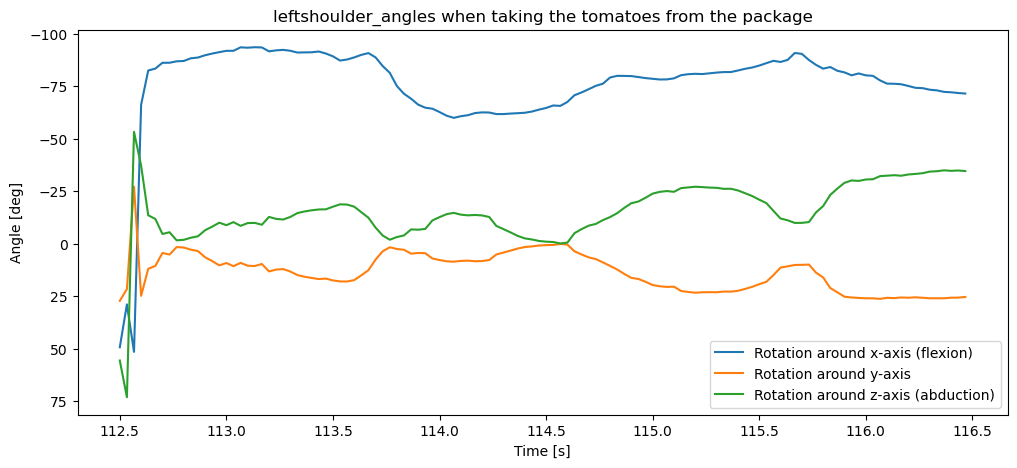

In [ ]:
plot_angles(df, 112.5, 116.5, 'leftshoulder_angles', event = 'taking the tomatoes from the package')

In [ ]:
df['leftshoulder_flexion'] = [angle[0] for angle in df['leftshoulder_angles']]

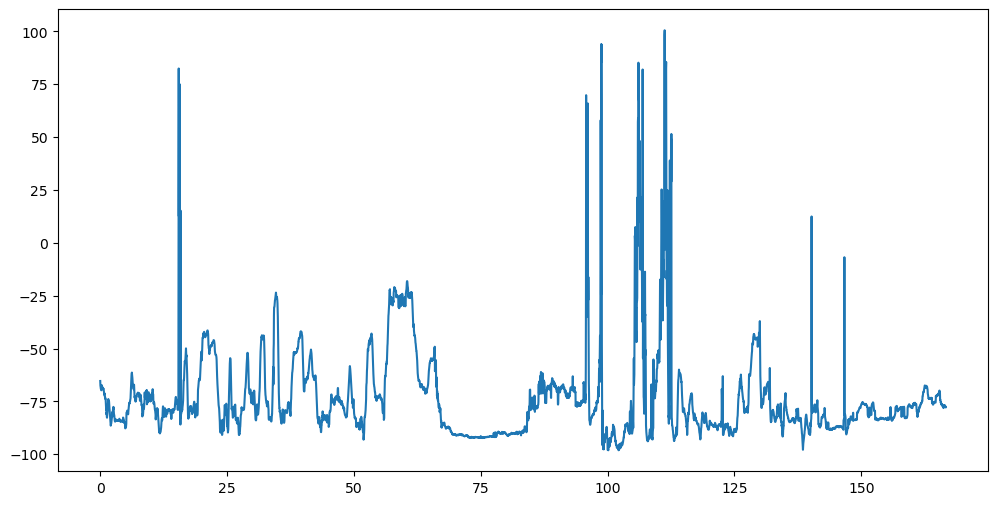

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['time'], df['leftshoulder_flexion'])

#### 2.2 Shoulder ab/adduction
In coronal plan

<a href='https://www.researchgate.net/publication/342490010_An_ergonomic_shoulder_for_robot-aided_rehabilitation_with_hybrid_control'><img src = 'https://www.researchgate.net/publication/342490010/figure/fig1/AS:960277239566349@1605959343300/Schematic-of-shoulder-abduction-adduction-and-vertical-flexion-extension.png' width = 300></a>

Let's check when the participant reach to the tomatoes in the fridge

In [ ]:
idx = time_id(df, 53, 53.5)
df['leftshoulder_angles'][idx[0]:idx[1]]

1590    [-46.39840671370845, 15.245540834828267, -34.6...
1591    [-46.05519194998695, 15.328627913138842, -35.1...
1592    [-46.17486704625846, 15.358685201656744, -35.1...
1593    [-48.04124548645463, 14.777166224018186, -32.4...
1594    [-48.02149573155248, 14.63097006010683, -32.15...
1595    [-45.49133756650919, 15.166279095642077, -35.2...
1596    [-45.17439484601991, 14.961748587296135, -35.0...
1597    [-46.61969892249095, 14.855004693361163, -33.6...
1598    [-46.11400737781675, 14.705442965408267, -33.7...
1599    [-45.11366883929146, 15.058276827121146, -35.3...
1600    [-44.62063158891098, 15.231489167682836, -36.0...
1601    [-44.24375613834712, 15.285382106874287, -36.5...
1602    [-43.41330718410702, 15.288652906637239, -37.2...
1603    [-43.28160719993238, 15.299609289182147, -37.4...
1604    [-42.92127930243128, 15.221433360144102, -37.5...
Name: leftshoulder_angles, dtype: object

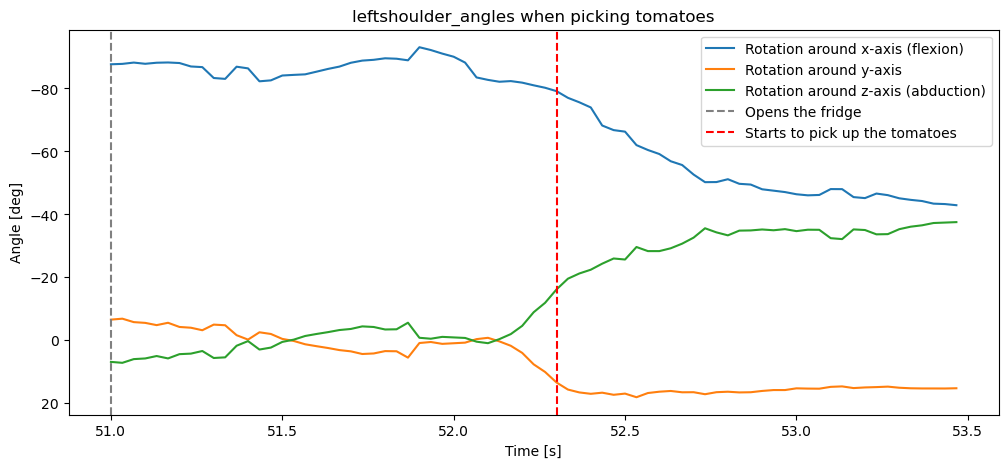

In [ ]:
plot_angles(df, 51, 53.5, 'leftshoulder_angles', event = 'picking tomatoes', 
            vertical_line1 = True, label_vertical1 = 'Opens the fridge', x_vertical1 = 51,
            vertical_line2 = True, x_vertical2 = 52.3, label_vertical2='Starts to pick up the tomatoes')

It is harder to completely isolate the abduction movement since in real world, human always do a mix of flexion/abduction movement. At least we can see some rotation around z-axis that correspond to the abduction movement.

Let's check with another moment when the participant checks the tomatoes

In [ ]:
idx = time_id(df, 62, 62.5)
df['leftshoulder_angles'][idx[0]:idx[1]]

1860    [-44.17478203766572, 15.113642553447793, -36.2...
1861    [-44.373893166306274, 14.739943046485665, -35....
1862    [-44.915632626460294, 14.838698948062657, -34....
1863    [-46.43573622596801, 15.16000591339513, -34.46...
1864    [-47.3040725176673, 15.455787634298561, -34.43...
1865    [-47.59934916422994, 15.294759558368009, -33.8...
1866    [-48.65609517211061, 15.458097757134471, -33.4...
1867    [-49.387023134345185, 15.352399313021124, -32....
1868    [-50.412025415081025, 15.681539478163486, -32....
1869    [-51.16308624277566, 15.793919737284208, -32.3...
1870    [-51.190441769705664, 15.982609895484755, -32....
1871    [-52.347891862721966, 16.94018055365898, -33.7...
1872    [-53.54293091594642, 16.997008787475473, -32.9...
1873    [-55.02096605685672, 17.14474684751953, -32.28...
1874    [-55.71511460984821, 17.21896879300236, -31.97...
Name: leftshoulder_angles, dtype: object

#### 3. Elbow flexion/extension

From litterature, the elbow joint allows us to perform flexion–extension and pronation–supination movement.

<a href="https://www.researchgate.net/figure/Normal-range-of-motion-for-the-elbow-joint_fig2_319499390"><img src="https://www.researchgate.net/publication/319499390/figure/fig2/AS:1086484513857552@1636049502528/Normal-range-of-motion-for-the-elbow-joint.jpg" alt="Normal range of motion for the elbow joint." width = "300" height = "300"/></a>

But since in our dataset, the pronation-supination movement is not captured, the joint angle of the elbow simply corresponds to the flexion-extension movement.
ref : Zwerus, E. L., Willigenburg, N. W., Scholtes, V. A., Somford, M. P., Eygendaal, D., & van den Bekerom, M. P. (2019). Normative values and affecting factors for the elbow range of motion. Shoulder & elbow, 11(3), 215–224. https://doi.org/10.1177/1758573217728711


Let's take the moment when the subjet reach the tomatoes in the fridge, left hand on the fridge door


In [ ]:
idx = time_id(df, 128.5, 129)
df['leftelbow_angles'][idx[0]:idx[1]]

3855    [24.486450043113635, -30.829616195321876, -103...
3856    [25.40523383574087, -31.51363944331685, -102.7...
3857    [26.642592053789855, -32.263608739572845, -101...
3858    [27.493774176702622, -32.56465992803683, -100....
3859    [27.175913365344396, -32.55651314067354, -100....
3860    [28.106820847881234, -33.09087400056888, -99.7...
3861    [30.54472385128707, -34.07046366107424, -96.58...
3862    [30.468042366874485, -33.77842051262641, -96.2...
3863    [30.72219958626668, -33.688553666089, -95.5608...
3864    [29.847137811130676, -33.13768043621882, -96.2...
3865    [30.325754993855085, -33.77264341691781, -96.4...
3866    [30.409502633570753, -33.74463298504347, -96.2...
3867    [30.969860268352846, -34.059250093919424, -95....
3868    [31.433558434107177, -34.25813639482942, -95.2...
3869    [31.78027189276065, -34.66778221194415, -95.26...
Name: leftelbow_angles, dtype: object

Elbow flexion/extension around z-axis

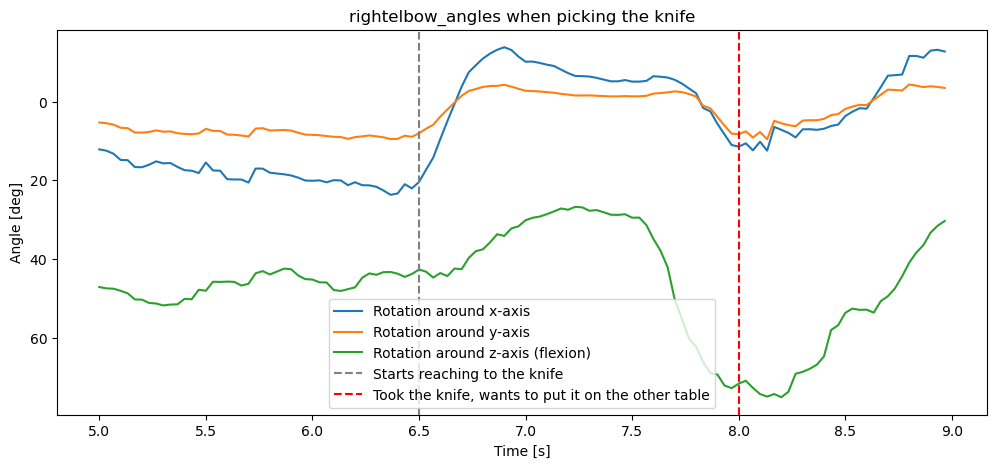

In [ ]:
plot_angles(df, 5, 9, 'rightelbow_angles', event= 'picking the knife', 
            vertical_line1=True, x_vertical1=6.5, label_vertical1='Starts reaching to the knife',
            vertical_line2=True, x_vertical2=8, label_vertical2='Took the knife, wants to put it on the other table')

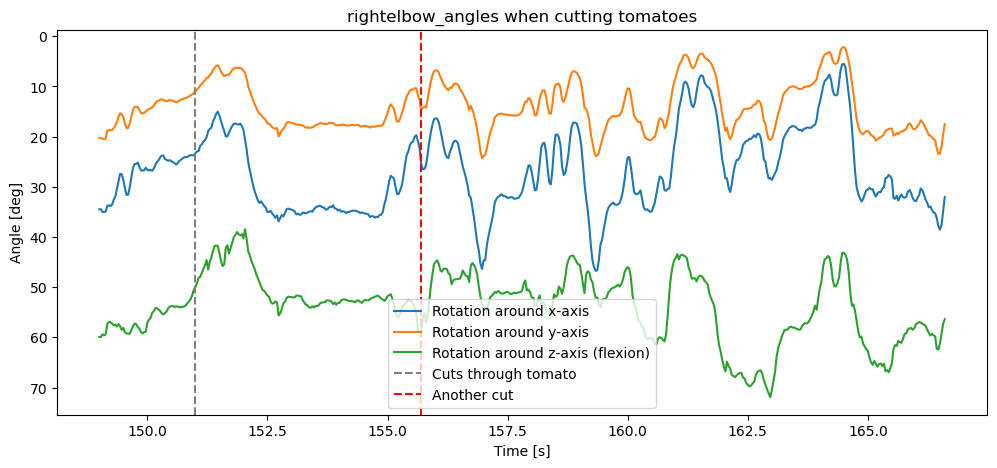

In [ ]:
t1 = events['cutting'][0][0]
t2 = events['cutting'][0][1]
plot_angles(df, t1, t2, joint_name = 'rightelbow_angles', event = 'cutting tomatoes', 
            vertical_line1=True, label_vertical1='Cuts through tomato', x_vertical1=151,
            vertical_line2=True, label_vertical2='Another cut', x_vertical2=155.7)

### Trunk movement definition

From this [paper](https://jneuroengrehab.biomedcentral.com/articles/10.1186/1743-0003-11-132#Sec2), they defined each trunk movement as such : 

- Trunk lateral flexion : angle between the trunk inferior-superior axis and table medial-lateral axis (i.e., table width) projected onto the frontal plane (zero angular displacement defined as perpendicular alignment of the trunk and table axes). The medial-lateral axis corresponds to the axis of the left/right hip

- Trunk transverse rotation : angle between the shoulder axis and table medial-lateral axis projected onto the transverse plane (zero angular displacement defined as parallel alignment of the shoulder and table axes)

- Trunk forward flexion : angle between the trunk inferior-superior axis and table anterior-posterior axis projected onto the sagittal plane (zero angular displacement defined as perpendicular alignment of the trunk and table axes)

#### 4.1 Trunk forward flexion
angle between the trunk inferior-superior axis and table anterior-posterior axis projected onto the sagittal plane (zero angular displacement defined as perpendicular alignment of the trunk and table axes)

But I'll define it as I thought myself on the 18th July.

In [ ]:
A = df['rightshoulder'] - df['hips']
B = df['leftshoulder'] - df['hips']
N = [np.cross(a, b) for a, b in zip(A, B)]
v_z = np.array([0, 0, 1])

V1_u = [unit_vector(n) for n in N]
DOT = [np.dot(v1_u, v_z) for v1_u in V1_u]
angle = 90 - np.arccos(DOT)*180/np.pi

df['trunk_forward_flex'] = angle

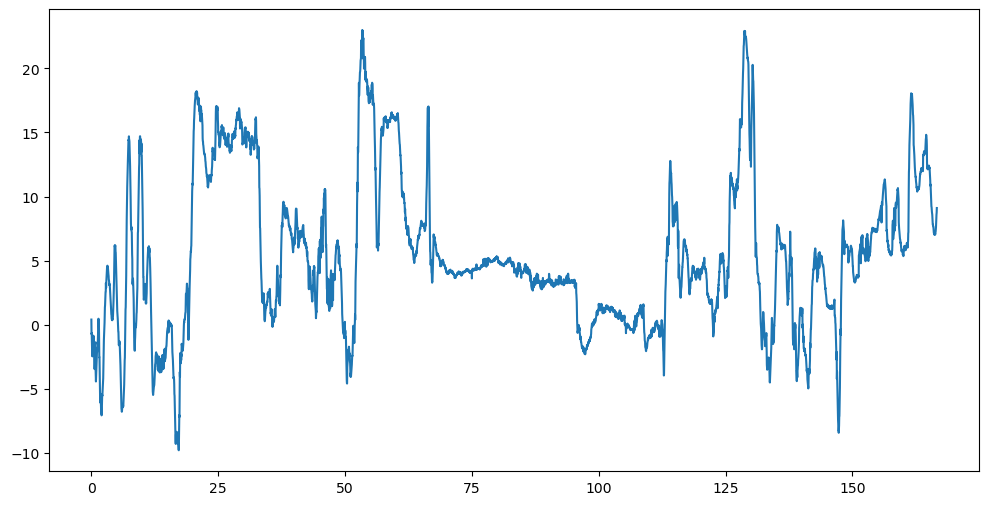

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df['time'], df['trunk_forward_flex'])


#### 4.2 Trunk lateral flexion
angle between the trunk inferior-superior axis and table medial-lateral axis (i.e., table width) projected onto the frontal plane (zero angular displacement defined as perpendicular alignment of the trunk and table axes). The medial-lateral axis corresponds to the axis of the left/right hip

It should corresponds to the rotation around z-axis of trunk angle. But as you can see here : 

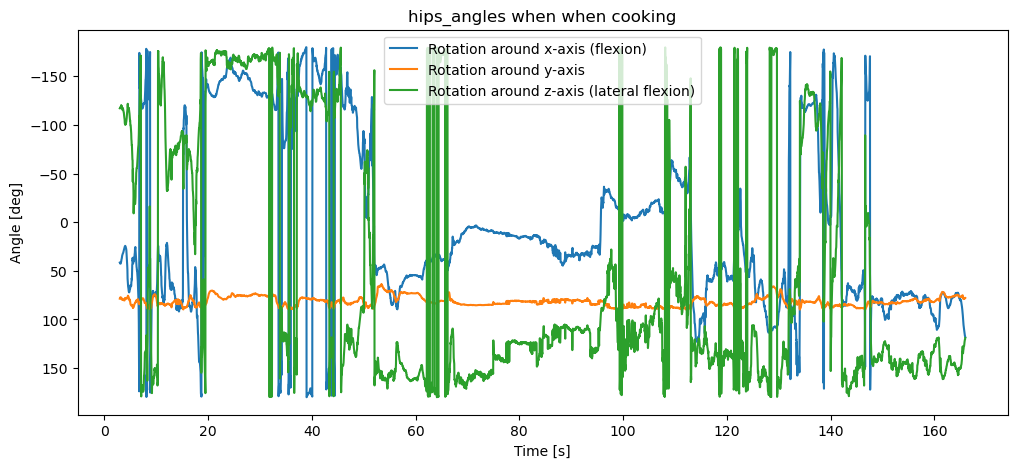

In [ ]:
plot_angles(df, t1 = 3, t2 = 166, joint_name = 'hips_angles', event = 'when cooking')

The rotation around z-axis seems like to do big movement. But this is because the angle is given as the obtuse angle between the trunk axis and the vertical axis. Let's then change this to the acute angle :

In [ ]:
new_z= []
for angle in df['hips_angles']:
    if angle[2] < 0:
        z_angle = -180 - angle[2]
    else:
        z_angle = 180 - angle[2]
    new_z.append(z_angle)

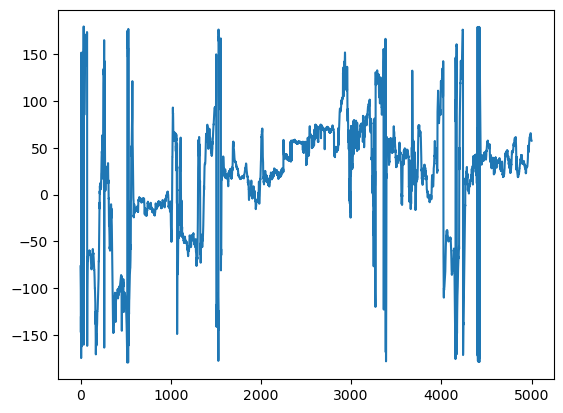

In [ ]:
plt.plot(new_z)

It's messy again. Let's apply the definition I came up on 18th July.

In [ ]:
A = df['righthip'] - df['hips']
B = df['neck'] - df['hips']

A_u = [unit_vector(a) for a in A]
B_u = [unit_vector(b) for b in B]
DOT = [np.dot(a_u, b_u) for a_u, b_u in zip(A_u, B_u)]
angle = 90 - np.arccos(DOT)*180/np.pi

df['trunk_lateral_flex'] = angle


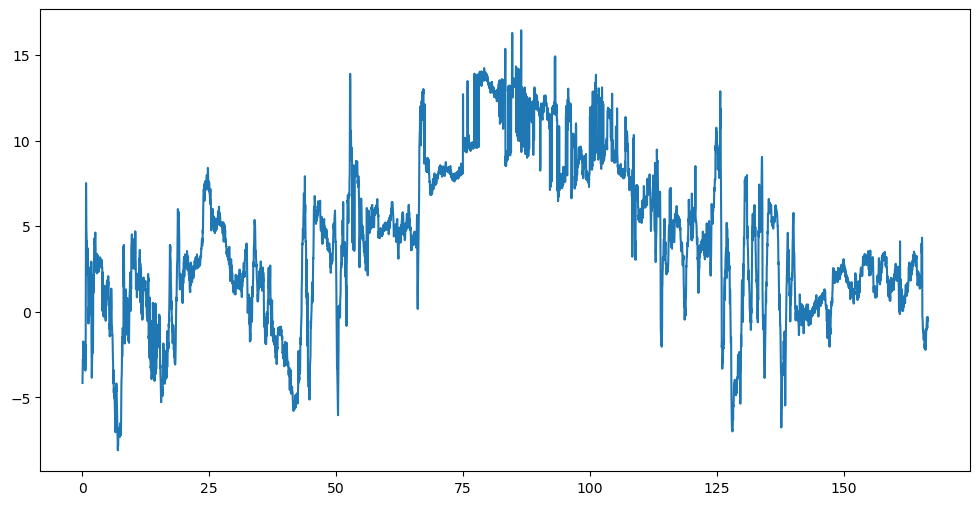

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df['time'], df['trunk_lateral_flex'])

#### 4.3 Trunk rotation
angle between the shoulder axis and table medial-lateral axis projected onto the transverse plane (zero angular displacement defined as parallel alignment of the shoulder and table axes)

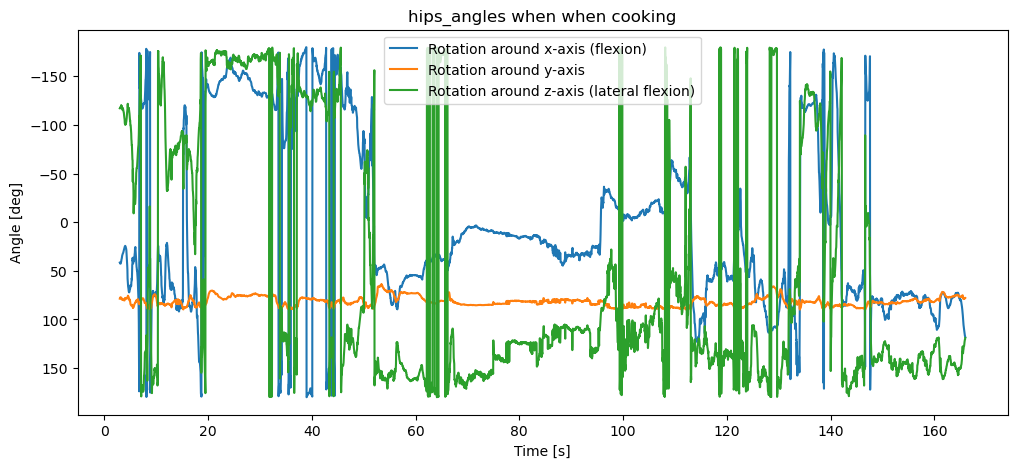

In [ ]:
plot_angles(df, t1 = 3, t2 = 166, joint_name = 'hips_angles', event = 'when cooking')

Looking at the previous graph, the rotation could actually corresponds to the y-axis ! 


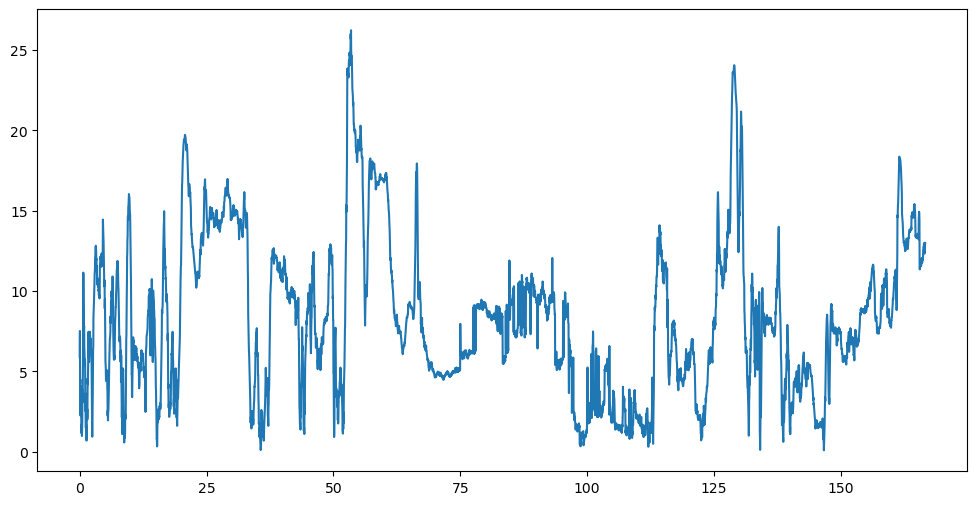

In [ ]:
rotation = [90 - angle[1] for angle in df['hips_angles']]

plt.figure(figsize = (12,6))
plt.plot(df['time'], rotation)

But seems like that it doesn't differentiate between a rotation towards the left or right. I'll then compute the rotation based on my theory on 18th July.

In [ ]:
"""
A = df['leftshoulder'] - df['rightshoulder']
B = df['lefthip'] - df['righthip']

z_position = [pos[2] for pos in df['hips']]

A = [np.array([a[0], a[1], z]) for a, z in zip(A, z_position)]

A_u = [unit_vector(a) for a in A]
B_u = [unit_vector(b) for b in B]
DOT = [np.dot(a_u, b_u) for a_u, b_u in zip(A_u, B_u)]

angle = np.arccos(DOT)*180/np.pi

#now lets define if the rotation is towards the left or right, based on the distance between both shoulders and the nose.
for shoulder_l, shoulder_r, nose in zip(df['leftshoulder'], df['rightshoulder'], df['point_0']):
    dist_l = np.linalg.norm(shoulder_l - nose)
    dist_r = np.linalg.norm(shoulder_r - nose)

    if dist_r < dist_l:
        
"""


"\nA = df['leftshoulder'] - df['rightshoulder']\nB = df['lefthip'] - df['righthip']\n\nz_position = [pos[2] for pos in df['hips']]\n\nA = [np.array([a[0], a[1], z]) for a, z in zip(A, z_position)]\n\nA_u = [unit_vector(a) for a in A]\nB_u = [unit_vector(b) for b in B]\nDOT = [np.dot(a_u, b_u) for a_u, b_u in zip(A_u, B_u)]\n\nangle = np.arccos(DOT)*180/np.pi\n\n#now lets define if the rotation is towards the left or right, based on the distance between both shoulders and the nose.\nfor shoulder_l, shoulder_r, nose in zip(df['leftshoulder'], df['rightshoulder'], df['point_0']):\n    dist_l = np.linalg.norm(shoulder_l - nose)\n    dist_r = np.linalg.norm(shoulder_r - nose)\n\n    if dist_r < dist_l:\n        \n"

### 5. Range of motion
Definition from this [paper](https://jneuroengrehab.biomedcentral.com/articles/10.1186/1743-0003-11-132#Sec2) RoM of each DoF was estimated by subtracting the maximum and minimum recorded angles.


In [ ]:
t1 = events['cutting'][0][0]
t2 = events['cutting'][0][1]
RoM_rightelbow = RoM(df, t1, t2, 'rightelbow_angles', axis = 0)
RoM_rightelbow

41.230354532523805

### 6. Absolute kinematic variability

Definition from this [paper](https://jneuroengrehab.biomedcentral.com/articles/10.1186/1743-0003-11-132#Sec2) : Absolute kinematic variability across the five trials was estimated as the average standard deviation (SD) across all time points of the normalized DoF angle trajectory

Pour chaque personne et chaque personne "type" d'action, calculer le SD de l'angle selon le mouvement (elbow flexion for ex.)
--> Faire la moyenne des SDs pour caractériser l'absolute kinematic variability d'une action pour une personne selon le joint movement
Ca donnera l'absolute kinematic variability chez une personne selon la tâche faite et le joint movement
(à voir s'il y a finalement une grosse différence de SDs déjà entre les personnes able-bodied...)

Ensuite, on peut encore calculer la moyenne parmi les "healthy" people, and les "amputees" pour faire une comparaison entre les 2 groupes.

On peut déjà calculer l'absolute kinematic variability pour notre personne ici.

In [ ]:
SD = []
for t1, t2 in events['picking_r']:
    idx = time_id(df, t1, t2)
    SD.append(np.std(df['rightelbow_angle'][idx[0]:idx[1]]))

np.mean(SD)

8.71341125615587

### More plots 
#### Average joints velocities

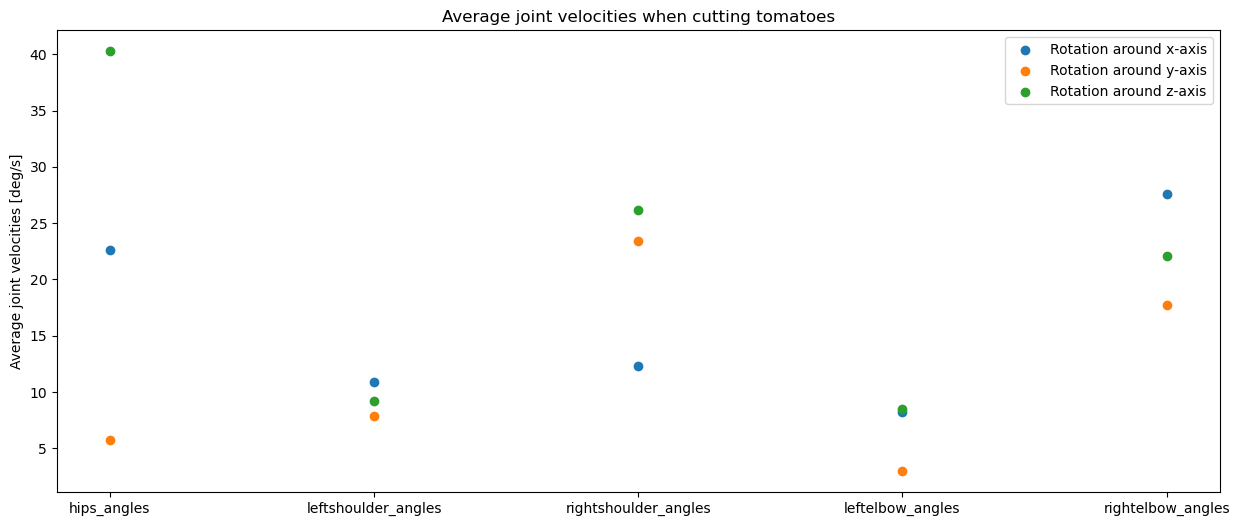

In [ ]:
#during cutting events
t1 = events['cutting'][0][0]
t2 = events['cutting'][0][1]
plot_joint_velocities(df, t1, t2, event = 'cutting tomatoes')

One can see that the person is right handed when cutting the tomatoes, since there are higher joint velocities on right body side.

#### Trajectories
Let's plot the right wrist trajectory while cutting some tomatoes

In [ ]:
""" Plots trajectory of a joint during an event. """
import plotly.express as px

def plot_trajectory(data, t1, t2, joint, event):
    idx = time_id(df, t1, t2)
    xdata = [point[0] for point in data[joint][idx[0]: idx[1]]]
    ydata = [point[1] for point in data[joint][idx[0]: idx[1]]]
    zdata = [point[2] for point in data[joint][idx[0]: idx[1]]]

    fig = px.line_3d(x = xdata, y = ydata, z = zdata, title=f'{joint} while {event}')
    fig.show()
    """
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
    ax.set_title(f'{joint} trajectory when {event}')
    """
t1 = events['cutting'][0][0]
t2 = events['cutting'][0][1]
plot_trajectory(df, t1, t2, joint = 'rightwrist', event = 'cutting tomatoes')

Seems like that the z-axis of hips is not that relevant.. Can I generate trunk movements features then ?

In [ ]:
t1 = events['picking_r'][0][0]
t2 = events['picking_r'][0][1]
plot_trajectory(df, 4, 9, joint = 'leftshoulder', event = 'washing hands')

In [ ]:
t1 = events['picking_r'][0][0]
t2 = events['picking_r'][0][1]
plot_trajectory(df, t1, t2, joint = 'rightwrist', event = 'picking the knife')

### Trunk movements plots

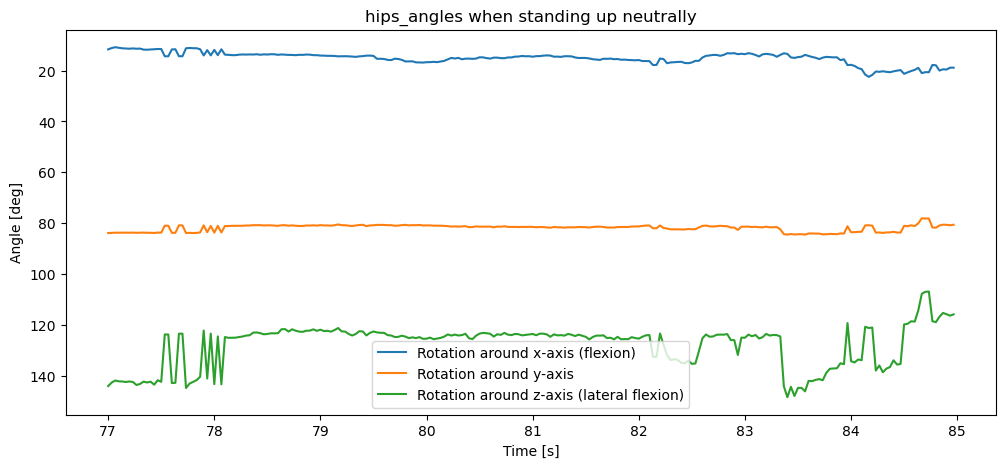

In [ ]:
plot_angles(df, t1 = 77, t2 = 85, joint_name = 'hips_angles', event = 'standing up neutrally')

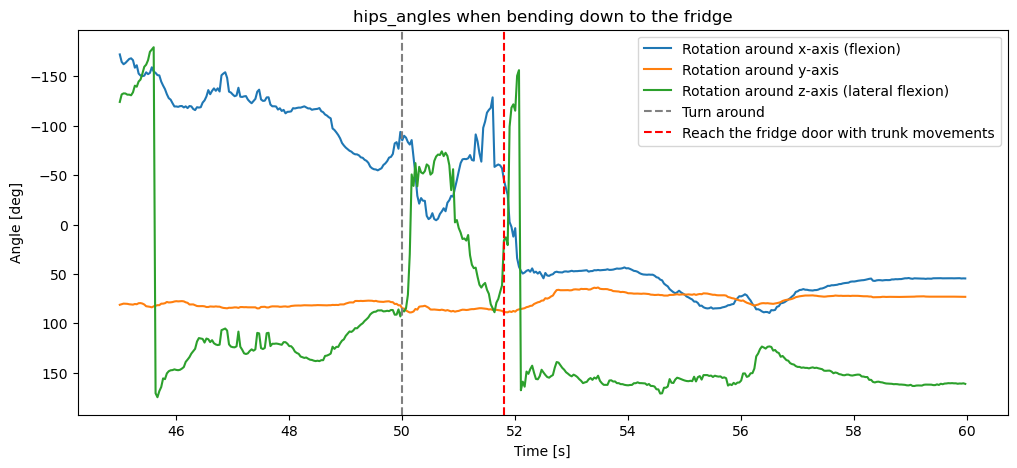

In [ ]:
plot_angles(df, t1 = 45, t2 = 60, joint_name = 'hips_angles', event = 'bending down to the fridge', 
            vertical_line1=True, x_vertical1=50, label_vertical1='Turn around',
            x_vertical2=51.8, vertical_line2=True, label_vertical2='Reach the fridge door with trunk movements')

### Events labellisation

During **picking**, there is usually : 
- Elbow extension
- Shoudler flexion/abduction
- Trunk rotation (maybe)
- Trunk forward flexion
- Trunk lateral flexion (maybe if it is too far away)
well all kind of movements basically

During **cutting** : 
- Elbow flexion
- Shoulder flexion/abduction

Later on, see if there is any difference between soft/hard vegetables, if they require different kind of movements

During **stirring**:
- Elbow flexion
- Shoulder flexion/abduction

{'picking_r': [[6, 7], [132.5, 134.5]],
 'cutting': [[149, 169]],
 'stirring': [[]]}

### Plot a video part

In [ ]:
"""
# loading video dsa gfg intro video 
clip = VideoFileClip("../data/small_data/merge_rgbposes.mp4") 
      
# getting only first 5 seconds 
clip = clip.subclip(6, 7) 
   
# showing  clip 
#clip.ipython_display(width = 360)
clip.write_videofile("test.mp4")
"""